<a href="https://colab.research.google.com/github/thessafuzaro/Trabalho_Imagens/blob/main/Cassificacao_Imagens_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Segundo Projeto de redes neurais
#Processamento de Imagens
#Aluna: Thessa Fuzaro Mendes
#Data: 03/07/2021

In [11]:
from matplotlib import pyplot as plt  # para fazer graficos
import numpy as np
import pandas as pd
import cv2  #biblioteca que trabalha com imagens
import random
import zipfile  #para trabalhar com arquivos zip
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [12]:
#clonando o diretório com os arquivos que estão no github
!git clone https://github.com/thessafuzaro/Trabalho_Imagens
%cd Trabalho_Imagens

Cloning into 'Trabalho_Imagens'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 80 (delta 36), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (80/80), done.
/content/Trabalho_Imagens/Trabalho_Imagens


In [13]:
#Extraindo os arquivos zip e salvando na variavel x
Arq =['Daisy.zip','Dandelion.zip','Rose.zip','Not_Flower.zip']  #importando os arquivos
Img_Size=80
img_name=[]  #lista em branco
x_gray=[]  
x_original = []
for FILE in Arq:
  file_name = zipfile.ZipFile(FILE, 'r')
  file_name.extractall()    #extraindo os arquivos e colocando em uma lista unica com os nomes
  with zipfile.ZipFile(FILE, "r") as f:
      for name in f.namelist():
          img_name.append(name)
         # print(name)
          x_gray.append(cv2.resize(cv2.imread(name, 0),(Img_Size,Img_Size)))

In [14]:
#Recuperando o nome com 4 primeiras letras
y_names = []
for yy in img_name:
  name = yy[0]+yy[1]+yy[2]+yy[3]
  y_names.append(name)
  #print(y_names)

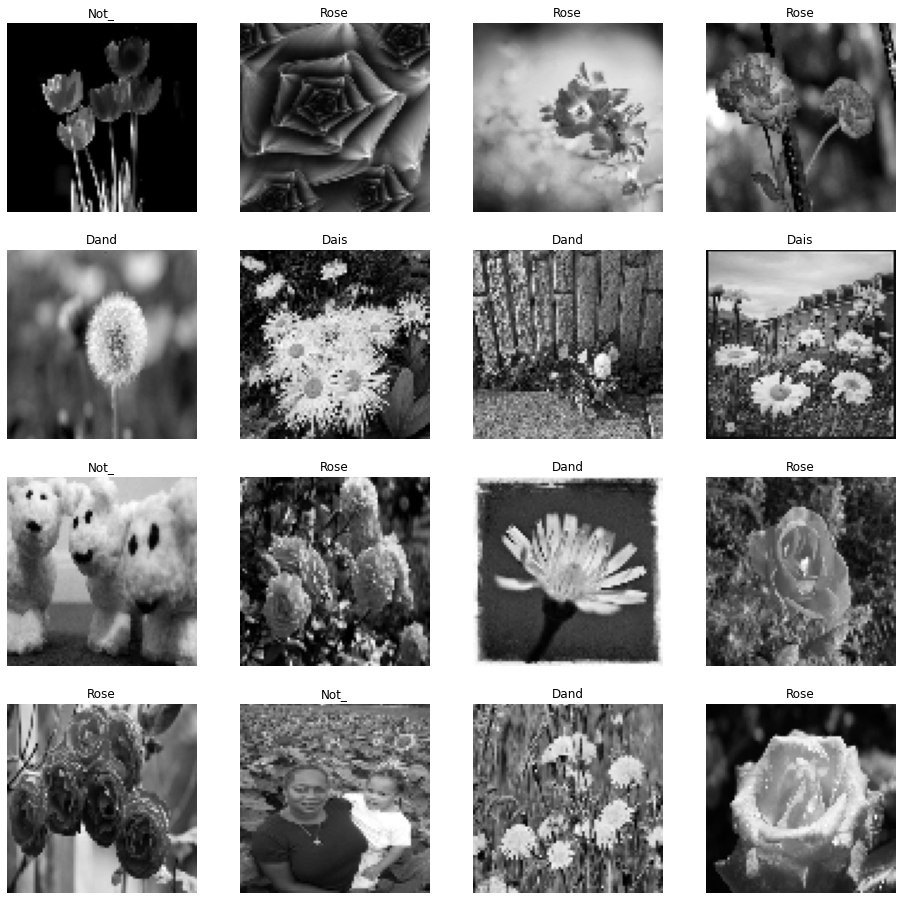

In [15]:
num = len(y_names)
plt.figure(figsize=(16,16))
for i in range (16) :
  ax = plt.subplot(4,4,i+1)
  kk = random.randrange(num)
  plt.imshow(x_gray[kk], cmap='gray')
  plt.title(y_names[kk])
  plt.axis("off")

In [16]:
unique_list = []      #gera uma lista unica 
for yy in y_names:
  if yy not in unique_list:
    unique_list.append(yy)

In [17]:
n = len(unique_list)  #separa em classes ao inves de nome aparece o índice referente
Y = []
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      Y.append(i)

In [18]:
X_data=[]
for xx in x_gray:
  X_data.append(xx.ravel())

X = pd.DataFrame(X_data)

In [26]:
#Separando os dados em 80% de treino e 20% de teste e misturando os dados
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.40, shuffle=True, random_state=3)

In [27]:
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

In [28]:
model = SVC()
model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
Y_calc_train=model.predict(X_train)
Y_calc_test=model.predict(X_test)

In [30]:
df = pd.DataFrame({'True':Y_train, 'Calc':Y_calc_train})
print(pd.crosstab(df['True'],df['Calc']))

Calc    0    1    2   3
True                   
0     217   20   33   0
1       7  208   44   0
2       8   18  287   0
3       4   16   35  27


In [31]:
df = pd.DataFrame({'True':Y_test, 'Calc':Y_calc_test})
print(pd.crosstab(df['True'],df['Calc']))

Calc   0   1   2
True            
0     95  35  63
1     46  66  70
2     42  52  96
3      5  17  29


In [32]:
Y_true = Y_test
Y_pred = Y_calc_test
Title = ['Daisy','Dandelion','Rose','Not_Flower']
print(classification_report(Y_true, Y_pred, target_names=Title))

              precision    recall  f1-score   support

       Daisy       0.51      0.49      0.50       193
   Dandelion       0.39      0.36      0.38       182
        Rose       0.37      0.51      0.43       190
  Not_Flower       0.00      0.00      0.00        51

    accuracy                           0.42       616
   macro avg       0.32      0.34      0.33       616
weighted avg       0.39      0.42      0.40       616



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
